In [2]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('data.csv')
df = df.drop(["dteday", "cnt", "registered", "casual", "instant"], axis=1)

In [7]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [8]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.501929,6.521495,11.541613,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036
std,1.116174,0.500019,3.444373,6.915838,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000
75%,4.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700


<Axes: >

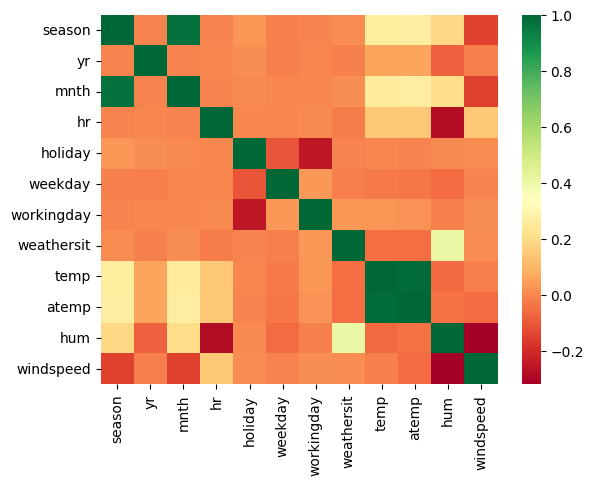

In [9]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [410]:
import torch.utils.data as data
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [411]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(df, columns=df.columns)
scaled_data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.501929,6.521495,11.541613,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036
std,1.116174,0.500019,3.444373,6.915838,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000
75%,4.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700


In [412]:
class OneLegDataset(data.Dataset):
    def __init__(self, scaler, path):
        super().__init__()
        df = pd.read_csv(path)
        self.data = torch.tensor(self.prepare_data(df, scaler).values, dtype=torch.float32)
        self.label = torch.tensor(df.iloc[:,-1], dtype= torch.int32)
        self.size = self.data.shape[0]

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

    def prepare_data(self, df, scaler):
        cleaned_data = df.drop(["dteday", "cnt", "registered", "casual", "instant", "season", "workingday"], axis=1)
        scaled_data = pd.DataFrame(scaler.fit_transform(cleaned_data), columns=cleaned_data.columns)
        return scaled_data


In [413]:
scaler = MinMaxScaler()
dataset = OneLegDataset(scaler, "data.csv")
len(dataset)

10886

In [414]:
batch_size = 64

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.label, test_size=0.2, random_state=42)

train_data = data.TensorDataset(X_train, y_train)
validation_data = data.TensorDataset(X_test, y_test)

train_loader = data.DataLoader(train_data, batch_size=batch_size, drop_last=True)
validation_loader = data.DataLoader(validation_data, batch_size=batch_size)


In [415]:
print(train_data.tensors)
print(y_train)

(tensor([[0.0000, 0.5455, 0.2174,  ..., 0.6949, 0.8300, 0.1053],
        [1.0000, 0.6364, 0.6957,  ..., 0.8983, 0.3900, 0.3509],
        [1.0000, 0.5455, 0.6522,  ..., 0.7796, 0.4100, 0.2982],
        ...,
        [0.0000, 1.0000, 0.6957,  ..., 0.2881, 0.4800, 0.2982],
        [0.0000, 0.0909, 0.3043,  ..., 0.4236, 0.1700, 0.6141],
        [1.0000, 0.3636, 0.3043,  ..., 0.5593, 0.8800, 0.2280]]), tensor([ 35, 450, 276,  ..., 234,  22, 358], dtype=torch.int32))
tensor([ 35, 450, 276,  ..., 234,  22, 358], dtype=torch.int32)


In [416]:
next(iter(train_loader))

[tensor([[0.0000, 0.5455, 0.2174, 0.0000, 0.5000, 0.0000, 0.6735, 0.6949, 0.8300,
          0.1053],
         [1.0000, 0.6364, 0.6957, 0.0000, 1.0000, 0.0000, 0.8980, 0.8983, 0.3900,
          0.3509],
         [1.0000, 0.5455, 0.6522, 0.0000, 0.5000, 0.0000, 0.7959, 0.7796, 0.4100,
          0.2982],
         [0.0000, 0.2727, 0.1739, 0.0000, 0.0000, 0.3333, 0.3469, 0.3898, 0.9300,
          0.1228],
         [0.0000, 0.9091, 0.4348, 0.0000, 1.0000, 0.0000, 0.3061, 0.3220, 0.4500,
          0.2982],
         [1.0000, 0.0909, 0.8261, 0.0000, 0.1667, 0.0000, 0.3265, 0.3559, 0.2500,
          0.1579],
         [0.0000, 1.0000, 0.8696, 0.0000, 0.5000, 0.6667, 0.3265, 0.3051, 0.8700,
          0.7544],
         [1.0000, 0.5455, 0.5217, 1.0000, 0.5000, 0.0000, 0.8571, 0.8644, 0.4100,
          0.2632],
         [1.0000, 0.8182, 0.9565, 0.0000, 0.3333, 0.3333, 0.6122, 0.5932, 0.9400,
          0.1228],
         [1.0000, 0.5455, 0.1739, 0.0000, 0.3333, 0.0000, 0.7143, 0.7457, 0.6200,
         

In [417]:
import torch.nn as nn

In [418]:

class OneLegRegression(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()
    self.linear1 = nn.Linear(num_inputs, 24)
    self.bn1 = nn.BatchNorm1d(24, momentum=0.1)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(24, 64)
    self.bn2 =  nn.BatchNorm1d(64, momentum=0.1)
    self.linear7 = nn.Linear(64, 24)
    self.bn3 = nn.BatchNorm1d(24, momentum=0.1)
    self.linear8= nn.Linear(24, num_outputs)

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.bn1(x)
    
    x = self.linear2(x)
    x = self.relu(x)
    x = self.bn2(x)
  
    x = self.linear7(x)
    x = self.relu(x)
    x = self.bn3(x)

    x = self.linear8(x)
    return x



In [419]:
dataset.data.shape[1]

10

In [420]:
import numpy as np

In [421]:
# def rmsle(y_true,y_pred):
#     n = len(y_true)
#     msle = np.mean([(np.log(max(y_pred[i],0) + 1) - np.log(y_true[i] + 1)) ** 2.0 for i in range(n)])
#     return np.sqrt(msle)

In [422]:
model = OneLegRegression(num_inputs=dataset.data.shape[1], num_outputs=1)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_module = nn.MSELoss()
# loss_function = rmsle


In [423]:
print(model)

OneLegRegression(
  (linear1): Linear(in_features=10, out_features=24, bias=True)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (linear2): Linear(in_features=24, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear7): Linear(in_features=64, out_features=24, bias=True)
  (bn3): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear8): Linear(in_features=24, out_features=1, bias=True)
)


In [424]:
len(validation_loader.dataset)

2178

In [425]:
train_losses, val_losses = [], []
batch_count = len(train_loader)

for epoch in range(50):
    train_batch_loss_sum, val_batch_loss_sum = 0, 0
    
    model.train()
    for train_inputs, train_labels in train_loader:
        preds = model(train_inputs)
        preds = preds.squeeze(dim=1)
        
        loss = loss_module(preds, train_labels.float())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_batch_loss_sum += loss.item()
    
    model.eval()
    for val_inputs, val_labels in validation_loader:
        val_preds = model(val_inputs)
        val_preds = val_preds.squeeze(dim=1)
        
        val_loss = loss_module(val_preds, val_labels.float())
        val_batch_loss_sum += val_loss.item()
        
        # with torch.no_grad():
        #     val_preds = pd.DataFrame(val_preds.squeeze(dim=1))
        #     val_labels = pd.DataFrame(val_labels)
        #     test_loss = loss_function(val_labels.astype(float).values, val_preds.values)
        
    train_batch_loss = train_batch_loss_sum / (len(train_loader.dataset))
    val_batch_loss = val_batch_loss_sum / (len(validation_loader.dataset))
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)

    print(f"Epoch {epoch}, Train loss: {train_batch_loss:.3f}, {val_batch_loss:.3f}")



/home/user/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/user/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Train loss: 327.196, 759.738
Epoch 1, Train loss: 213.154, 747.001
Epoch 2, Train loss: 203.862, 730.672
Epoch 3, Train loss: 192.213, 774.891
Epoch 4, Train loss: 181.755, 755.389
Epoch 5, Train loss: 167.788, 741.629
Epoch 6, Train loss: 185.321, 755.532
Epoch 7, Train loss: 177.703, 746.446
Epoch 8, Train loss: 150.158, 765.769
Epoch 9, Train loss: 147.969, 776.307
Epoch 10, Train loss: 140.167, 754.202
Epoch 11, Train loss: 136.770, 762.645
Epoch 12, Train loss: 133.574, 846.952
Epoch 13, Train loss: 130.561, 792.123
Epoch 14, Train loss: 127.758, 797.464
Epoch 15, Train loss: 126.897, 796.482
Epoch 16, Train loss: 123.261, 824.363
Epoch 17, Train loss: 119.207, 818.118
Epoch 18, Train loss: 114.617, 811.012
Epoch 19, Train loss: 113.409, 833.386
Epoch 20, Train loss: 112.593, 829.497
Epoch 21, Train loss: 105.934, 857.214
Epoch 22, Train loss: 102.764, 828.009
Epoch 23, Train loss: 99.779, 839.992
Epoch 24, Train loss: 98.280, 860.751


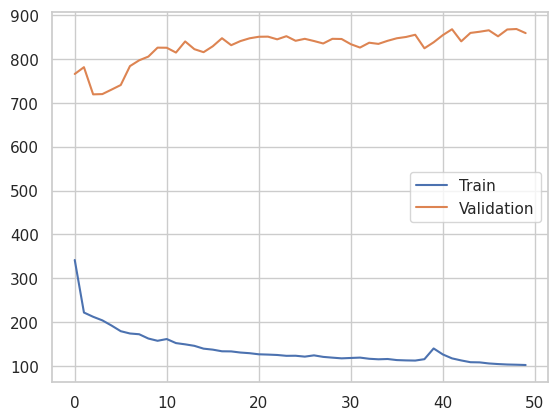

In [385]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.legend(["Train", "Validation"])



In [324]:
print(preds)

tensor([ 4.5876e+01,  3.7144e+02, -6.2273e+00,  1.5254e+02,  4.7046e+00,
         2.7063e+02,  6.8476e+01,  5.8140e+01,  1.5702e+02,  8.6917e+00,
         2.0676e+02,  1.7028e+02,  2.1276e+02,  2.0731e+01,  2.5970e+02,
         3.1300e+01,  1.4005e+02,  3.5845e+02,  3.4010e+02,  4.1574e+02,
         2.8302e+02,  7.0453e+02,  3.7848e+02,  6.3739e+01,  6.5471e+02,
         1.6214e+01,  1.4150e+02,  3.1130e+02, -3.5907e+00,  1.4991e+01,
         1.5870e+02,  7.3249e+01,  5.1683e+02,  3.9470e+01, -4.5761e-01,
         7.8046e-01,  2.0945e+02, -5.6179e-01,  1.0377e+02,  3.6546e+02,
         2.5443e+02,  4.1764e+01,  1.9139e+02,  1.1281e+02,  3.4412e+02,
         1.7377e+02,  3.5123e+02,  1.3069e+02,  1.2407e+02,  1.6397e+01,
         1.7353e+02,  2.8431e+02,  8.4448e+01,  3.2562e+02,  1.9791e+02,
         1.4606e+02,  3.2348e+01,  1.3804e+01,  5.1024e+01,  3.8685e+02,
         3.6916e+02,  1.0901e+01,  2.8946e+02,  4.9351e+01],
       grad_fn=<SqueezeBackward1>)


In [329]:
import numpy as np

In [330]:
def rmsle(y_true,y_pred):
    n = len(y_true)
    msle = np.mean([(np.log(max(y_pred[i],0) + 1) - np.log(y_true[i] + 1)) ** 2.0 for i in range(n)])
    return np.sqrt(msle)

In [338]:

with torch.no_grad():
    preds = pd.DataFrame(preds)
    print(preds)
    targets = pd.DataFrame(y_test.float())
    print(targets)
    rmsle(targets.values,preds.values)

             0
0    45.875523
1   371.439697
2    -6.227293
3   152.543930
4     4.704621
..         ...
59  386.851501
60  369.156708
61   10.900852
62  289.457245
63   49.351166

[64 rows x 1 columns]
          0
0     127.0
1      13.0
2     163.0
3     233.0
4     222.0
...     ...
2173  351.0
2174    2.0
2175  509.0
2176    5.0
2177  239.0

[2178 rows x 1 columns]


IndexError: index 64 is out of bounds for axis 0 with size 64